In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from wordcloud import WordCloud
import re
import random
import string
import math
import itertools

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding,Conv1D,Bidirectional,SpatialDropout1D,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import Callback,ModelCheckpoint,CSVLogger,ReduceLROnPlateau,LearningRateScheduler,EarlyStopping
from tensorflow.keras.optimizers import Adam

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 8.5 MB/s eta 0:00:00
     ------------------------------------- 439.2/439.2 kB 28.6 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 38.3 MB/s eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 59.0 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 47.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 35.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 31.4 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 34.4 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     ------------------------------------- 781.3/781.3 kB 24.9 MB/s eta 0:00:00
     ------------------------------------- 1

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding,Conv1D,Bidirectional,SpatialDropout1D,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import Callback,ModelCheckpoint,CSVLogger,ReduceLROnPlateau,LearningRateScheduler,EarlyStopping
from tensorflow.keras.optimizers import Adam

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
from sklearn.metrics import confusion_matrix,classification_report

In [10]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
!pip install pyspellchecker
from spellchecker import SpellChecker

[nltk_data] Downloading package stopwords to C:\Users\Gauri
[nltk_data]     Patole\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ---------------------------------------- 2.5/2.5 MB 15.6 MB/s eta 0:00:00


In [11]:
np.random.seed(31415)
tf.random.set_seed(2)

In [12]:
plt.style.use('fivethirtyeight')

In [13]:
df = pd.read_csv("C:\Users\Gauri Patole\Desktop\TS.csv",encoding = 'latin',header=None)
df.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (46207181.py, line 1)

In [14]:
import pandas as pd

df = pd.read_csv("C:/Users/Gauri Patole/Desktop/TS.csv", encoding='latin', header=None)


In [15]:
df.head()


0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....

In [16]:
print(f"There are {df.shape[0]} ROWS and {df.shape[1]}")

There are 1048576 ROWS and 6


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1048576 non-null  int64 
 1   1       1048576 non-null  int64 
 2   2       1048576 non-null  object
 3   3       1048576 non-null  object
 4   4       1048576 non-null  object
 5   5       1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [18]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [19]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']

In [20]:
df["sentiment"].value_counts()

0    800000
4    248576
Name: sentiment, dtype: int64

In [21]:
df = df.groupby('sentiment').apply(lambda x: x.sample(n=50000)).reset_index(drop = True)

df.sentiment.value_counts()

0    50000
4    50000
Name: sentiment, dtype: int64

In [22]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
df.sentiment = df.sentiment.apply(lambda x: lab_to_sentiment[x])
df.head()

sentiment          id                          date     query  \
0  Negative  2259627954  Sat Jun 20 17:54:06 PDT 2009  NO_QUERY   
1  Negative  2055130076  Sat Jun 06 08:45:17 PDT 2009  NO_QUERY   
2  Negative  2060217645  Sat Jun 06 18:29:11 PDT 2009  NO_QUERY   
3  Negative  1969301425  Fri May 29 23:36:39 PDT 2009  NO_QUERY   
4  Negative  2058365567  Sat Jun 06 14:47:42 PDT 2009  NO_QUERY   

          user_id                                               text  
0          pau_86  @carol_carter1 I don't think so  I believe it ...  
1  baseball_mommy  @nursebc1974 I know!!!  My boys r wide awake, ...  
2      hannuhhhx3  @Maddieeann either he didn't mean to send it t...  
3     TwistedEdge  @MSWindows I really wish microsoft would stop ...  
4  luuvasconcelos  @tommcfly I still think that brazilian's fans ...

Text(0.5, 1.0, 'Sentiment Target Distribution')

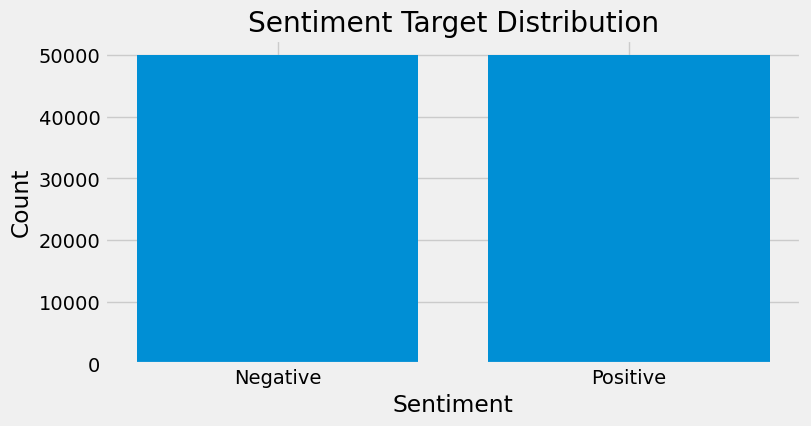

In [23]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Target Distribution")

In [24]:
ind=np.random.randint(0,1000,(10)) 
df.iloc[ind].text

415    had horrible sleep last night  but can makeit ...
89     @CYNTHIARENEE I can't do it... Idk what to do....
178    has a very unhappy baby who got his shots toda...
935               so bored. why don't i go out anymore? 
555                                            headache 
387    @orisue i agree but he didnt think of me and g...
9               Too... Early... To be up on the weekend 
317    @shershantreyl you suck my big ass is in a nin...
359    @iandexter Hmmm, this one's more underhanded t...
623    @RoShine Not even! I BBMed u a few sats ago 2 ...
Name: text, dtype: object

In [25]:
l_remove="don, don't, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mustn't, needn, needn't, shan, shan't, shouldn, shouldn't, wasn, wasn't, weren, weren't, won, won't, wouldn, wouldn't"
stop_words=[i for i in stopwords.words('english') if i not in l_remove.split(", ")]

In [26]:
pattern = "(@\S+)|(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])"

In [27]:
punct=string.punctuation

In [28]:
stemmer = SnowballStemmer('english')

In [29]:
def remove_numb(text):
    return re.sub("[0-9]+","",text)

In [30]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [31]:
v=[]
for i in df.text:
    v.append(re.findall(r'(@\S+)',i))   
    
v1=[i for i in v if len(i)!=0]
print(f"There are {len(v1)} rows with Mentions(@yyy) in their text")

There are 46462 rows with Mentions(@yyy) in their text


In [32]:
v=[]
for i in df.text:
    v.append(re.findall(r'(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])',i))   

v2=[i for i in v if len(i)!=0]
print(f"There are {len(v2)} rows with Hyperlinks(http://yyy) in their text")

There are 4245 rows with Hyperlinks(http://yyy) in their text


In [33]:
v1[:10]

[['@carol_carter1'],
 ['@nursebc1974'],
 ['@Maddieeann'],
 ['@MSWindows'],
 ['@tommcfly'],
 ['@KristinaDeFonte'],
 ['@afylayouts'],
 ['@Leanne0710'],
 ['@Hetty4Christ'],
 ['@MARCUS_KENNY']]

In [34]:
v2[:10]

[[('http', 'plurk.com', '/p/xhfhf')],
 [('http', 'myloc.me', '/5ABP')],
 [('http', 'twitpic.com', '/7tsbt')],
 [('http', 'plurk.com', '/p/x88wx')],
 [('http', 'twitpic.com', '/6ou3m')],
 [('http', 'myloc.me', '/4NiF')],
 [('http', 'tinyurl.com', '/dy7lcy')],
 [('http', 'myloc.me', '/2IEY')],
 [('http', 'myloc.me', '/2QXk')],
 [('http', 'tr.im', '/oMSv')]]

In [35]:
def funct_clean(x,stem=False):
    ### Removing Mentions and Hyperlinks:
    sentence = re.sub(pattern, ' ', str(x).lower()).strip()
    ### Converting to lower case:
    sentence = sentence.lower()
    ### Removing punctuation marks:
    sentence=sentence.translate(str.maketrans('', '', punct))
    ### Tokenising:
    words = word_tokenize(sentence)
    tokens = []
    for token in words:
        if token not in stop_words:   ### Checking whether the token is a stop word
            if stem:
                tokens.append(stemmer.stem(token))  ### Stemming the token(Less time taken)
            else:
                tokens.append(token)
    
    ## Removing numbers
    t1=remove_numb(" ".join(tokens)).split()
    ## can include the speller function while returning
    return t1

In [36]:
%%time

df["text_pre"] = df.text.apply(lambda x: funct_clean(x,1))

Wall time: 16 s


In [37]:
data=df.iloc[:1000].copy()
data[["text","text_pre"]]

text  \
0    @carol_carter1 I don't think so  I believe it ...   
1    @nursebc1974 I know!!!  My boys r wide awake, ...   
2    @Maddieeann either he didn't mean to send it t...   
3    @MSWindows I really wish microsoft would stop ...   
4    @tommcfly I still think that brazilian's fans ...   
..                                                 ...   
995  and when I got out my phone was dead :[[ it li...   
996       @Anna_Montanna Yeah but it isn't activated.    
997               Aww  i'm at retarded leadership shit   
998  @cehouck that's because we're like the same pe...   
999  Crap! I screwed up my entire Adobe Suite insta...   

                                              text_pre  
0                     [dont, think, believ, one, time]  
1    [know, boy, r, wide, awak, n, im, fallin, asleep]  
2    [either, didnt, mean, send, hes, play, hard, get]  
3    [realli, wish, microsoft, would, stop, push, s...  
4    [still, think, brazilian, fan, better, alredi,...  
..                                                 ...  
995               [got, phone, dead, live, week, ughh]  
996                                [yeah, isnt, activ]  
997                [aww, im, retard, leadership, shit]  
998  [that, like, person, ahaha, ps, messag, wed, p...  
999  [crap, screw, entir, adob, suit, instal, hope,...  

[1000 rows x 2 columns]

In [38]:
df.columns

Index(['sentiment', 'id', 'date', 'query', 'user_id', 'text', 'text_pre'], dtype='object')

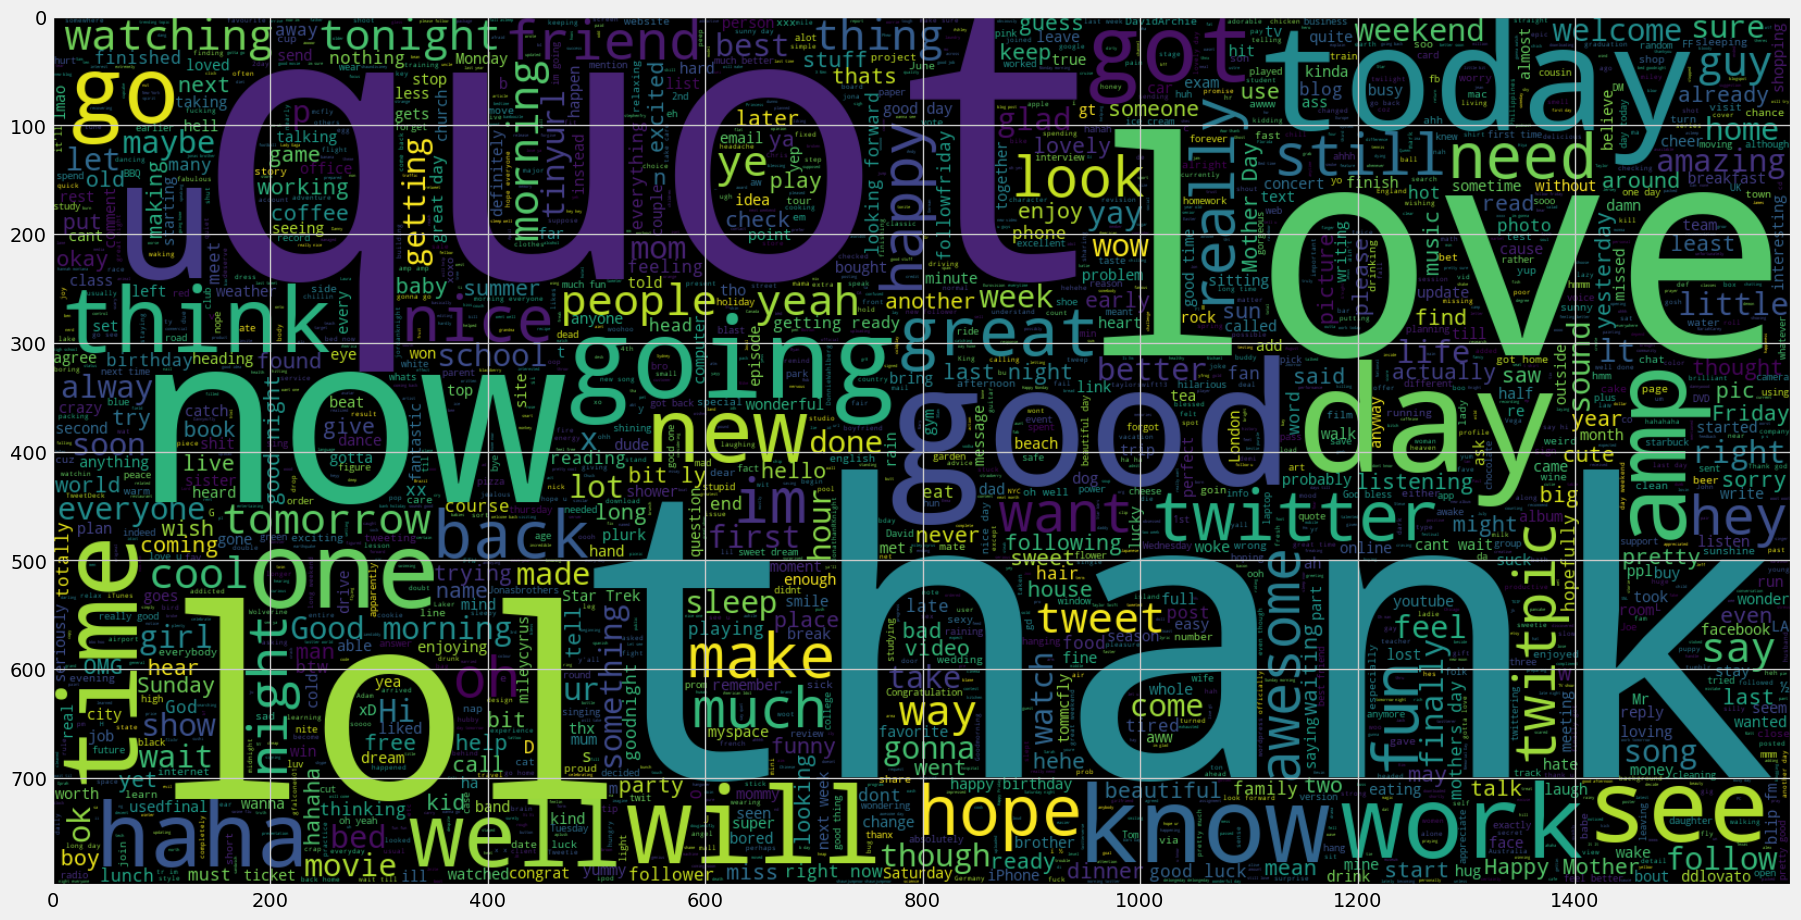

In [39]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

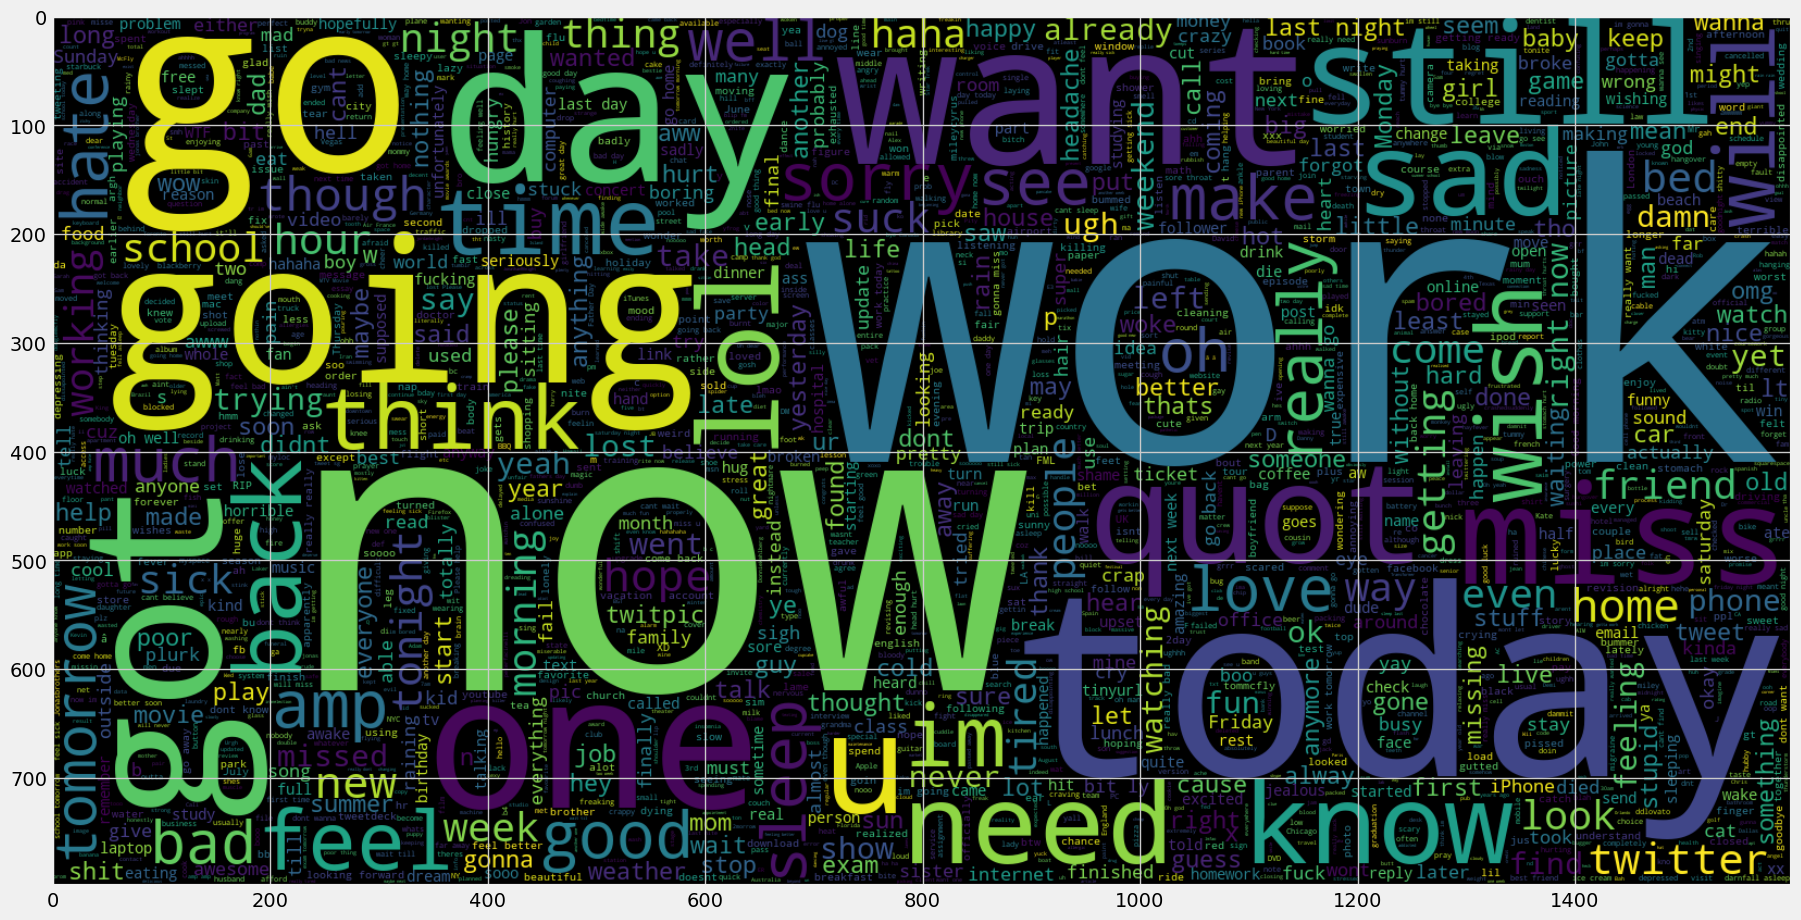

In [40]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [41]:
MAX_NB_WORDS = 10000  ## 100000
MAX_SEQUENCE_LENGTH = 30  ## each document can be of max length 30

In [42]:
train_data, test_data = train_test_split(df[["sentiment","text_pre"]], test_size=0.2,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 80000
Test Data size 20000


In [43]:
train_data.head(10)

sentiment                                           text_pre
91526  Positive                 [congrat, new, site, look, awesom]
19416  Negative                 [etsywiki, come, get, error, page]
99079  Positive                          [brilliant, check, thank]
45086  Negative                                      [final, exam]
54659  Positive   [present, thank, love, beer, beach, picnic, mat]
50266  Positive  [welcom, twitter, offici, great, daynight, whe...
62172  Positive                         [tri, tweet, cheer, squad]
66637  Positive                     [oh, know, itï¿½, caus, iï¿½m]
95845  Positive                            [vill, heaven, tonight]
98862  Positive                      [almost, friday, twitterssss]

In [44]:

tokenizer = Tokenizer()   
tokenizer.fit_on_texts(train_data.text_pre) ## Whole text is passed into the object
### Tries to create a dictionary of vocabulary 

SyntaxError: invalid syntax (1805491961.py, line 1)

In [45]:
tokenizer = Tokenizer()   
tokenizer.fit_on_texts(train_data.text_pre)

In [46]:
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("\nVocabulary Size :", vocab_size)  


Vocabulary Size : 46654


In [47]:
for i,(j,k) in enumerate(word_index.items()):
    print(j,"-------->",k)
    if i==10:
        break

im --------> 1
go --------> 2
day --------> 3
get --------> 4
good --------> 5
work --------> 6
like --------> 7
love --------> 8
got --------> 9
dont --------> 10
today --------> 11


In [48]:
def check_(to_check):
    print(f"-------------ROW {to_check}:---------------")
    print(f"The Train data is: {train_data.text_pre.iloc[to_check]}")
    print(f"The Vectorised Equivalent is: {tokenizer.texts_to_sequences(train_data.text_pre)[to_check]}\n")

check_(0)
check_(5)

-------------ROW 0:---------------
The Train data is: ['congrat', 'new', 'site', 'look', 'awesom']
The Vectorised Equivalent is: [532, 33, 425, 38, 90]

-------------ROW 5:---------------
The Train data is: ['welcom', 'twitter', 'offici', 'great', 'daynight', 'wherev', 'u']
The Vectorised Equivalent is: [238, 41, 510, 45, 8669, 3429, 22]



In [49]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text_pre),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text_pre),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (80000, 30)
Testing X Shape: (20000, 30)


In [50]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (80000, 1)
y_test shape: (20000, 1)


In [51]:
%%time

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


Wall time: 154 ms


'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [52]:
embeddings_index = {}

### Processing the file
for line in open(glove_path):
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

print('Found %s word vectors.' %len(embeddings_index))

NameError: name 'glove_path' is not defined

In [53]:
glove_path = '/kaggle/working/glove.6B.300d.txt'
embedding_dim = 300   ### Controls the dimension size of the vector space
model_path = '.../output/kaggle/working/best_model.hdf5'

In [54]:
embeddings_index = {}

### Processing the file
for line in open(glove_path):
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

print('Found %s word vectors.' %len(embeddings_index))

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/glove.6B.300d.txt'

In [55]:
%%time

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


Wall time: 76.5 ms


'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [56]:
sudo apt-get install wget unzip


SyntaxError: invalid syntax (1336679771.py, line 1)

In [57]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))  
for word, i in word_index.items():  ### unpacking the dictionary
    ### Checking whether the word exists in the pretrained embeddings_index
    embedding_vector = embeddings_index.get(word)  
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [58]:
def funct_view_embedding(word):
    print(f"For the word \"{word}\", its respective vector representation in a 300 Dimensional Space is:")
    print("\n",embedding_matrix[word_index[f"{word}"]])

funct_view_embedding("love")  ## since "love" is present in the vocabulary

For the word "love", its respective vector representation in a 300 Dimensional Space is:

 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [59]:
embedding_matrix.shape

(46654, 300)

In [60]:
embedding_layer = Embedding(vocab_size,embedding_dim,
                                        weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH, ### length of longest sentence
                                          trainable=False)

In [61]:
lr = 1e-2

## Creating the Layers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs) ## Model Object with input and output layers

## using the standard Adam as the optimiser(can be tweaked according to the user)
model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           13996200  
                                                                 
 spatial_dropout1d (SpatialD  (None, 30, 300)          0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 26, 64)            96064     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 512)               66048 

In [62]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,mode="auto")

## Model Checkpoint Object:
checkpoint_path = 'model_checkpoints/'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=True,
    verbose=1
)


In [63]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1,   
    patience=5, 
    min_lr=0.001,
    verbose=1
)

In [64]:
def lr_decay(epoch, lr):
    if epoch != 0 and epoch % 5 == 0:
        return lr * 0.2
    return lr

lrs=LearningRateScheduler(lr_decay, verbose=1)

In [65]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on CPU...


In [66]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on CPU...


In [67]:
batch_size = 1000
epochs = 20
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(x_test, y_test), callbacks=[early_stopping,lrs])


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/20
80/80 [==============================] - 56s 646ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5012 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/20
80/80 [==============================] - 50s 628ms/step - loss: 0.6932 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.5012 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/20
80/80 [==============================] - 52s 649ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5012 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/20
80/80 [==============================] - 50s 622ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6933 - val_accuracy: 0.4988 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.0

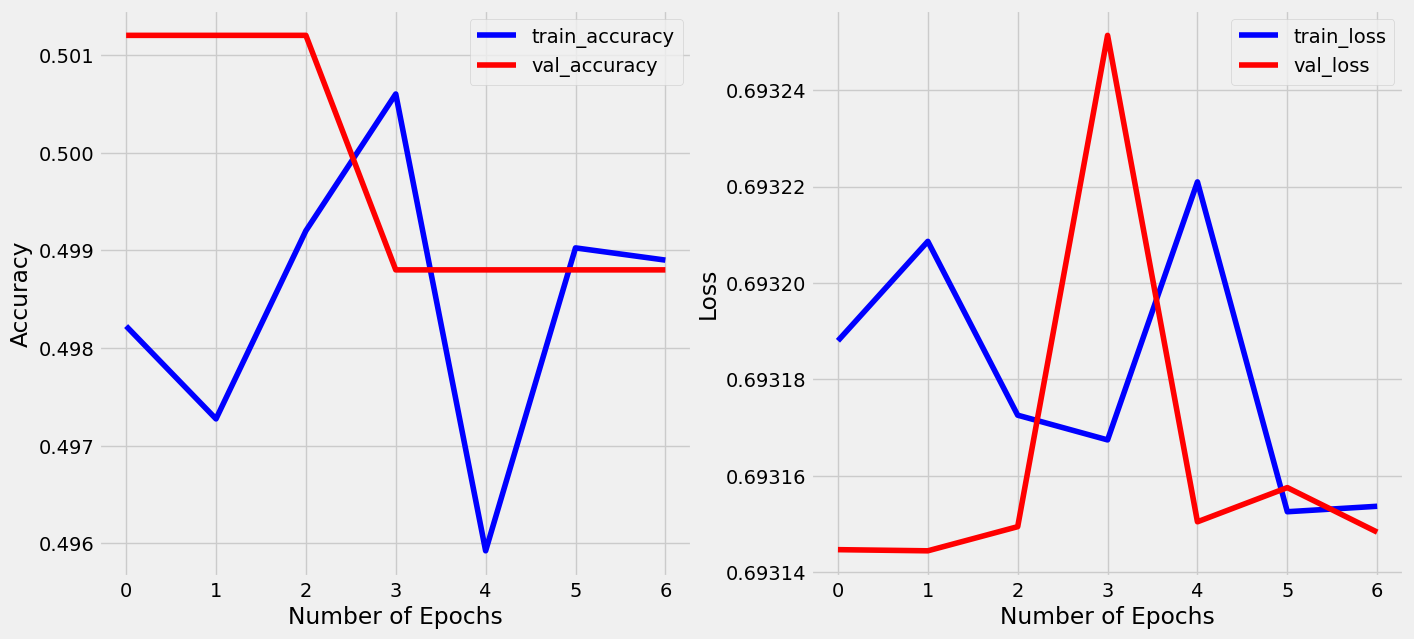

In [68]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].plot(history.history['accuracy'],c= 'b',label="train_accuracy")
ax[0].plot(history.history['val_accuracy'],c= 'r',label="val_accuracy")
ax[0].set_xlabel("Number of Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend()

ax[1].plot(history.history['loss'],c= 'b',label="train_loss")
ax[1].plot(history.history['val_loss'],c= 'r',label="val_loss")
ax[1].set_xlabel("Number of Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend()

In [69]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=1000)
y_pred_1d = [decode_sentiment(score) for score in scores]

20/20 [==============================] - 3s 122ms/step


In [1]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=1000)
y_pred_1d = [decode_sentiment(score) for score in scores]

NameError: name 'model' is not defined

In [2]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.bwr):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)
    
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)


NameError: name 'plt' is not defined

In [3]:
import matplotlib.pyplot as plt


In [4]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.bwr):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)
     fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

IndentationError: unexpected indent (3761429740.py, line 12)

In [5]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.bwr):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)
    
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17) 

In [6]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

NameError: name 'confusion_matrix' is not defined

In [7]:
from sklearn.metrics import confusion_matrix


In [8]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

NameError: name 'test_data' is not defined

In [9]:
print(test_data)

NameError: name 'test_data' is not defined

In [10]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

NameError: name 'classification_report' is not defined

In [11]:
print(classification_report(list(TS.sentiment), y_pred_1d))

NameError: name 'classification_report' is not defined

In [12]:
from sklearn.metrics import classification_report


In [13]:
print(classification_report(list(TS.sentiment), y_pred_1d))

NameError: name 'TS' is not defined

In [14]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

NameError: name 'test_data' is not defined

In [15]:
import pandas as pd
test_data = pd.read_csv('TS.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'TS.csv'

In [16]:
y_pred_1d = ...
print(classification_report(list(test_data.sentiment), y_pred_1d))


NameError: name 'test_data' is not defined